In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
N = 1000
X = np.random.random((N,2)) * 6 -3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

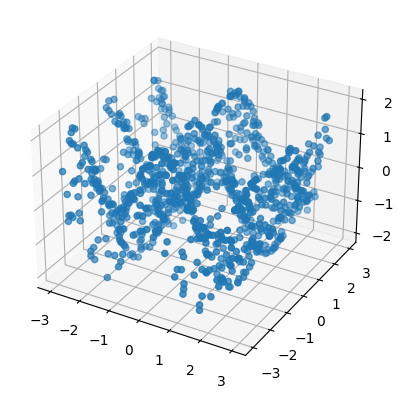

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0] , X[:,1],Y)


In [4]:
model = nn.Sequential(
    nn.Linear(2,128),
    nn.ReLU(),
    nn.Linear(128,1)
)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr= 0.01)

In [5]:
def full_gd(model, criterion, optimizer, X_train, y_train, n_epochs = 1000 ):
  train_losses = np.zeros(n_epochs)
  # total number of iteration is in fact #n_epochs * #batches
  for it in range(n_epochs):
      optimizer.zero_grad()
      outputs = model(X_train)
      loss = criterion(outputs, y_train)
      loss.backward()
      optimizer.step()
      train_losses[it] = loss.item()
      if (it +1) % 50 == 0:
        print(f'Epoch {it+1}/{n_epochs}, Train Loss {loss.item():.4f}')
  return train_losses

In [6]:
X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(Y.astype(np.float32).reshape(-1,1))
train_losses = full_gd(model, criterion, optimizer, X_train, y_train)

Epoch 50/1000, Train Loss 0.6889
Epoch 100/1000, Train Loss 0.3335
Epoch 150/1000, Train Loss 0.0944
Epoch 200/1000, Train Loss 0.0172
Epoch 250/1000, Train Loss 0.0081
Epoch 300/1000, Train Loss 0.0056
Epoch 350/1000, Train Loss 0.0046
Epoch 400/1000, Train Loss 0.0060
Epoch 450/1000, Train Loss 0.0032
Epoch 500/1000, Train Loss 0.0078
Epoch 550/1000, Train Loss 0.0029
Epoch 600/1000, Train Loss 0.0027
Epoch 650/1000, Train Loss 0.0190
Epoch 700/1000, Train Loss 0.0025
Epoch 750/1000, Train Loss 0.0024
Epoch 800/1000, Train Loss 0.0024
Epoch 850/1000, Train Loss 0.0025
Epoch 900/1000, Train Loss 0.0023
Epoch 950/1000, Train Loss 0.0022
Epoch 1000/1000, Train Loss 0.0044


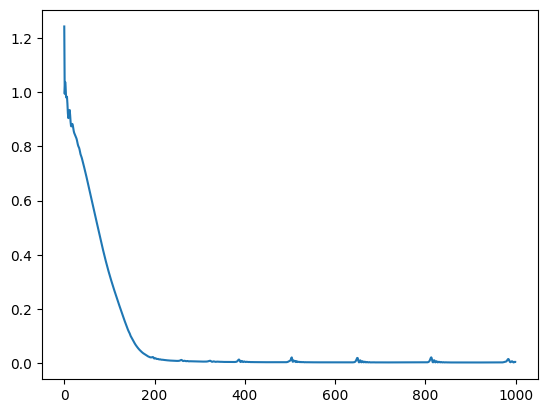

In [7]:
plt.plot(train_losses)

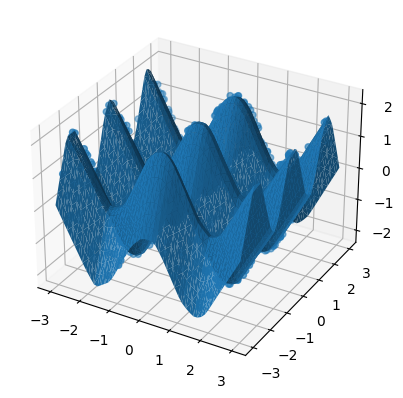

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:,1], Y)

with torch.no_grad():
  line = np.linspace(-3, 3, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0] , Xgrid[:, 1], Yhat, linewidth=0.2, antialiased= True)
  plt.show()